In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

#1) Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных.

In [ ]:
auto_mpg_df = pd.read_csv('auto-mpg.data.txt', sep='\s+', names=["mpg","cylinders","displacement","horsepower","weight","acceleration","model year","origin","car name"])
auto_mpg_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [ ]:
tabledata = [["mpg", "Запас хода на 1 галлоне топлива", "float"],
             ["cylinders", "Количество цилиндров", "int"],
             ["displacment", "Объём бака", "float"],
             ["horsepower", "Мощность двигателя", "float"],
             ["weight", "Вес автомобиля", "float"],
             ["acceleration", "Ускорение", "float"],
             ["model year", "Год выпуска", "int"], 
             ["origin", "Место производства", "int"],
             ["car name", "Название автомобиля", "string"]]
tabledata
pd.DataFrame(tabledata, columns=["Переменная","Описание", "Параметры"])

,Переменная,Описание,Параметры
0,mpg,Запас хода на 1 галлоне топлива,float
1,cylinders,Количество цилиндров,int
2,displacment,Объём бака,float
3,horsepower,Мощность двигателя,float
4,weight,Вес автомобиля,float
5,acceleration,Ускорение,float
6,model year,Год выпуска,int
7,origin,Место производства,int
8,car name,Название автомобиля,string


#2) Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции

In [ ]:
print("Количество строк и столбцов до удаления строк с дубликатами: ",auto_mpg_df.shape)
print("Количество строк и столбцов после удаления строк с дубликатамих: ",auto_mpg_df.drop_duplicates().shape)

Количество строк и столбцов до удаления строк с дубликатами:  (398, 9)
Количество строк и столбцов после удаления строк с дубликатамих:  (398, 9)


#3) Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

In [ ]:
auto_mpg_df.info()
auto_mpg_df['horsepower'] = pd.to_numeric(auto_mpg_df['horsepower'],errors = 'coerce')
auto_mpg_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float6

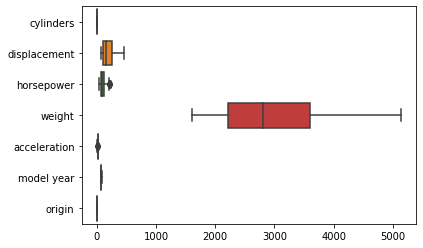

In [ ]:
numerical_attributes = [column for column in auto_mpg_df.columns if auto_mpg_df[column].dtype.name != 'object' and auto_mpg_df[column].name != 'mpg']
sns.boxplot(data = auto_mpg_df[numerical_attributes], orient = 'h')

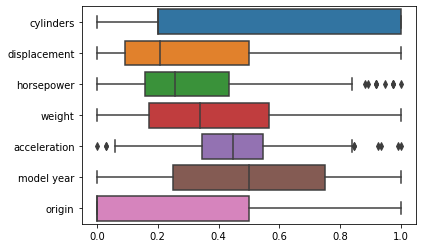

In [ ]:
auto_mpg_df[numerical_attributes] = preprocessing.MinMaxScaler().fit_transform(auto_mpg_df[numerical_attributes].values.astype(float))
sns.boxplot(data = auto_mpg_df[numerical_attributes], orient = 'h')

#4) Выполните замену категориальных признаков; выберите и обоснуйте способ замены

In [ ]:
categorical_attributes = [column for column in auto_mpg_df.columns if auto_mpg_df[column].dtype.name == 'object']
print(categorical_attributes)
auto_mpg_df = auto_mpg_df.drop(categorical_attributes, axis=1)

['car name']


#5) Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации)

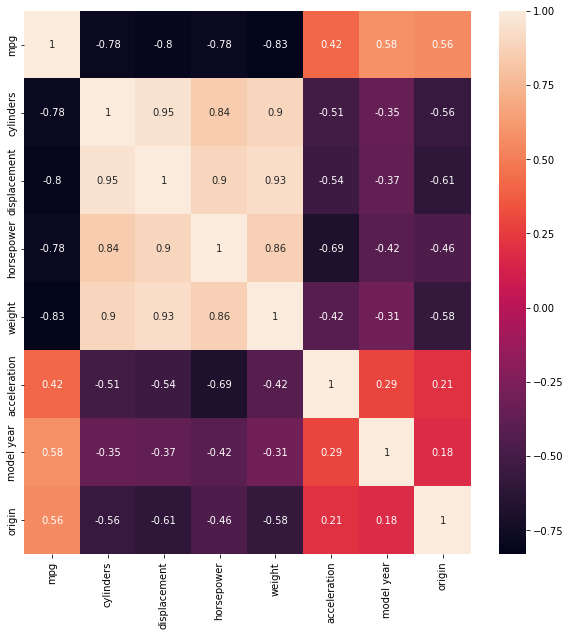

In [ ]:
corr_matrix = auto_mpg_df.corr()
fig=plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True)

#6) Заполните пропущенные значения в данных;

In [ ]:
auto_mpg_df = auto_mpg_df.fillna(auto_mpg_df.mean())
auto_mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    float64
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    float64
 7   origin        398 non-null    float64
dtypes: float64(8)
memory usage: 25.0 KB


#7) Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии). Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value.

In [ ]:
X = auto_mpg_df.drop(['mpg'], axis=1)
Y = auto_mpg_df['mpg']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

##Линейная регрессия без использования регуляризаторов

In [ ]:
reg = LinearRegression()
reg.fit(X_train,Y_train)
reg_pred = reg.predict(X_test)
print(reg.coef_)
print(reg.intercept_)

[ -4.54636232   8.86319758  -1.91368848 -23.1458462    1.60945192
   8.64777045   2.40534128]
26.773785743709535


In [ ]:
Person, p_value_Person = pearsonr(reg_pred, Y_test)
Spirmen, p_value_Spirmen = spearmanr(reg_pred, Y_test)

print('Погшрешность:', mean_squared_error(reg_pred, Y_test))
print("Корреляция по Пирсону: ", Person)
print("Корреляция по Спирмену: ", Spirmen)

Погшрешность: 11.626743549541343
Корреляция по Пирсону:  0.8895227373363416
Корреляция по Спирмену:  0.9299647405645631


In [ ]:
#plt.plot(X_test, Y_test, '^r', alpha=0.5)
#plt.plot(X_test, reg_pred, '^b', alpha=0.5)

##Линейная регрессия, LASSO регуляризатор;

In [ ]:
reg = Lasso()
reg_grid = GridSearchCV(reg, {'alpha': np.arange(0, 3, 0.005)})
reg_grid.fit(X_train, Y_train)
best_alpha = reg_grid.best_estimator_.alpha

reg = Lasso(alpha=best_alpha)
reg.fit(X_train, Y_train)
reg_pred = reg.predict(X_test)

print(reg.coef_)
print(reg.intercept_)
print('альфа:', best_alpha)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.183e+03, tolerance: 1.434e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

[ -2.40187799  -0.          -0.         -18.47364533   0.
   8.26273281   1.84054044]
27.24694307213952
альфа: 0.05


In [ ]:
Person, p_value_Person = pearsonr(reg_pred, Y_test)
Spirmen, p_value_Spirmen = spearmanr(reg_pred, Y_test)

print('Погшрешность:', mean_squared_error(reg_pred, Y_test))
print("Корреляция по Пирсону: ", Person)
print("Корреляция по Спирмену: ", Spirmen)

Погшрешность: 11.626743549541343
Корреляция по Пирсону:  0.8895227373363416
Корреляция по Спирмену:  0.9299647405645631
